# Demo of the AttractorField class

In [1]:
import numpy as np
import time

from gradplanner.planner.attractor_field import AttractorField
from gradplanner.planner.utils import plot_grad_field

In [2]:
%load_ext autoreload
%autoreload 2

## 1: Creating an Attractor field and then inserting extra obstacles into it

In [3]:
# Defining an occupancy grid:
scale = 2
M = 32 * scale
N = 32 * scale
goal_position = np.array([25 * scale, 6 * scale]) 

# creating the boarder:
occupancy_grid = np.ones((M, N))
occupancy_grid[1: -1, 1: -1] = np.zeros((M - 2, N - 2))

# obstacles:
occupancy_grid[4 * scale: 9 * scale, 10 * scale: 16 * scale] = 1

# just another occ grid with the goal for plotting:
occ_grid_to_plot = occupancy_grid.copy()
occ_grid_to_plot[goal_position[0], goal_position[1]] = -1

Initialization time: 0.47918176651000977s


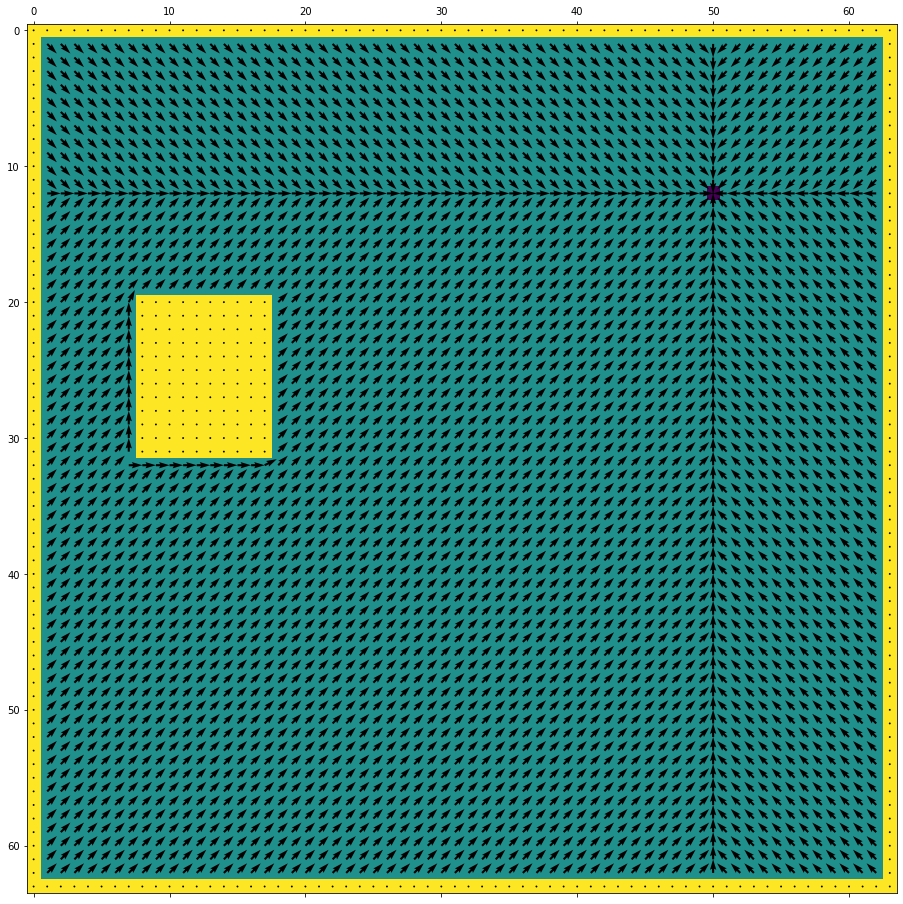

In [4]:
# creating the AttractorField object:
start_time = time.time()
attractor = AttractorField(occupancy_grid=occupancy_grid, goal=goal_position)
print("Initialization time: {}s".format(time.time() - start_time))
attractor.plot_grad()

In [5]:
# some new obstacles:
occupancy_grid[15 * scale: 20 * scale, 9 * scale: 13 * scale] = 1
# u-shaped obstacle:
occupancy_grid[16 * scale: 26 * scale, 20 * scale: 22 * scale] = 1
occupancy_grid[16 * scale: 18 * scale, 21 * scale: 26 * scale] = 1
occupancy_grid[24 * scale: 26 * scale, 21 * scale: 26 * scale] = 1
occupancy_grid[18 * scale: 20 * scale, 25 * scale: 26 * scale] = 1
occupancy_grid[22 * scale: 24 * scale, 25 * scale: 26 * scale] = 1

Updating time: 0.2481060028076172s


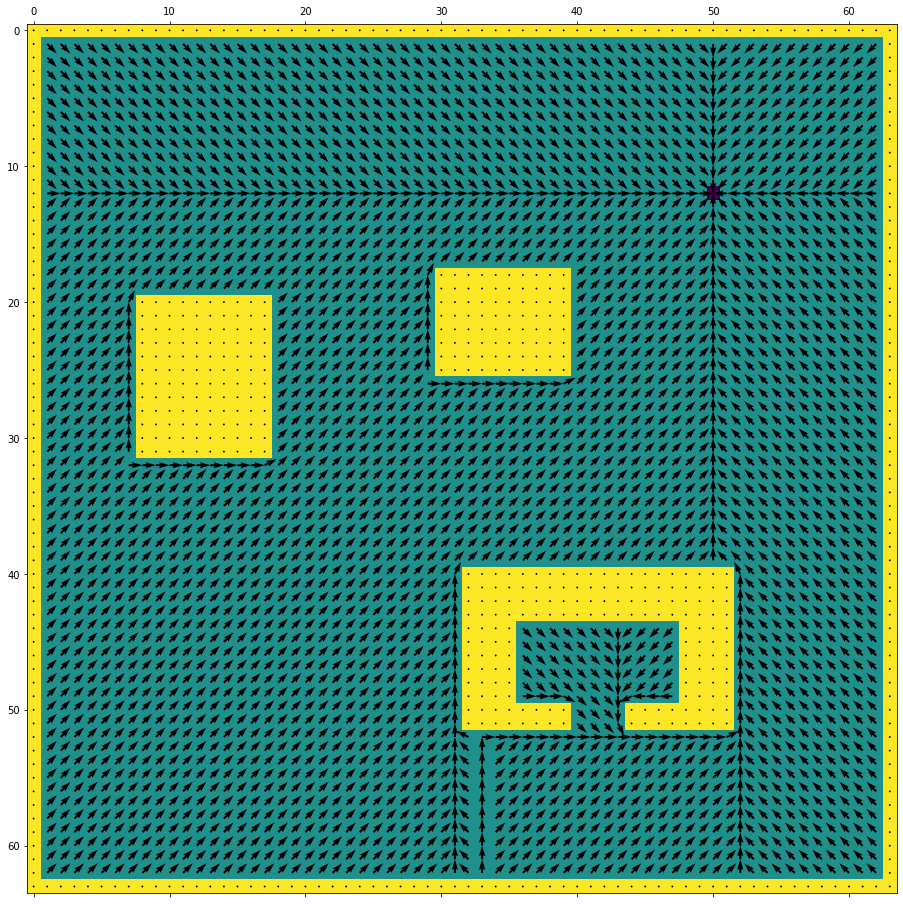

In [6]:
# updating the AttractorField object with the new occupancy_grid:
start_time = time.time()
attractor.update_occupancy_grid(occupancy_grid)
print("Updating time: {}s".format(time.time() - start_time))
attractor.plot_grad()

Updating time: 0.0040090084075927734s


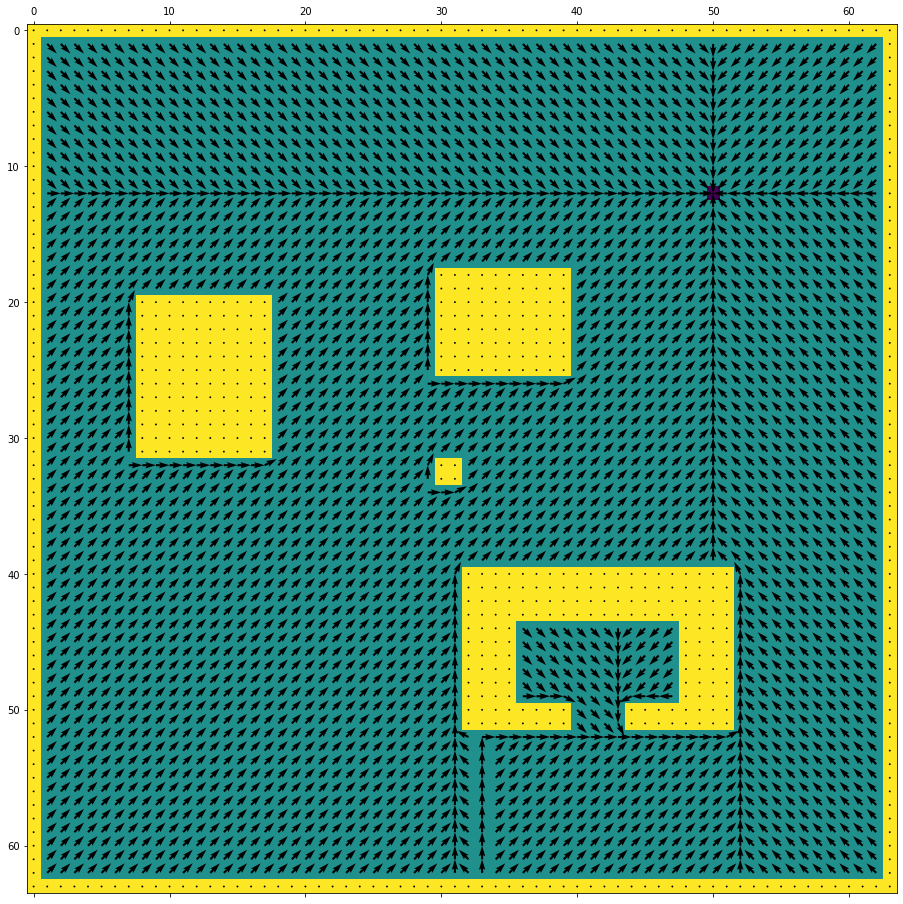

In [7]:
# timing some small changes:
occupancy_grid[30: 32, 32: 34] = 1

start_time = time.time()
attractor.update_occupancy_grid(occupancy_grid)
print("Updating time: {}s".format(time.time() - start_time))
attractor.plot_grad()

## 2: Removing objects from the map:

In [8]:
# deleting obstacles:
occupancy_grid[15 * scale: 20 * scale, 9 * scale: 13 * scale] = 0
# u-shaped obstacle:
occupancy_grid[16 * scale: 26 * scale, 20 * scale: 22 * scale] = 0
occupancy_grid[16 * scale: 18 * scale, 21 * scale: 26 * scale] = 0
occupancy_grid[24 * scale: 26 * scale, 21 * scale: 26 * scale] = 0
occupancy_grid[18 * scale: 20 * scale, 25 * scale: 26 * scale] = 0
occupancy_grid[22 * scale: 24 * scale, 25 * scale: 26 * scale] = 0

Updating time: 0.21018242835998535s


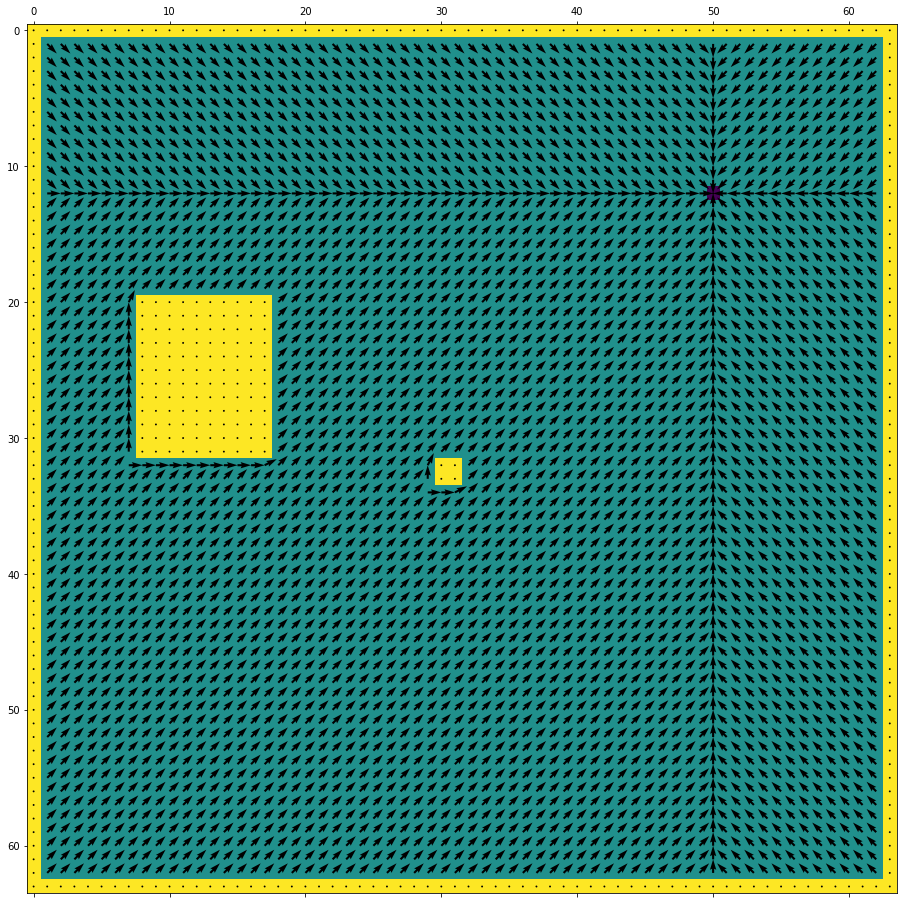

In [9]:
# updating the AttractorField object with the new occupancy_grid:
start_time = time.time()
attractor.update_occupancy_grid(occupancy_grid)
print("Updating time: {}s".format(time.time() - start_time))
attractor.plot_grad()

Updating time: 0.005316019058227539s


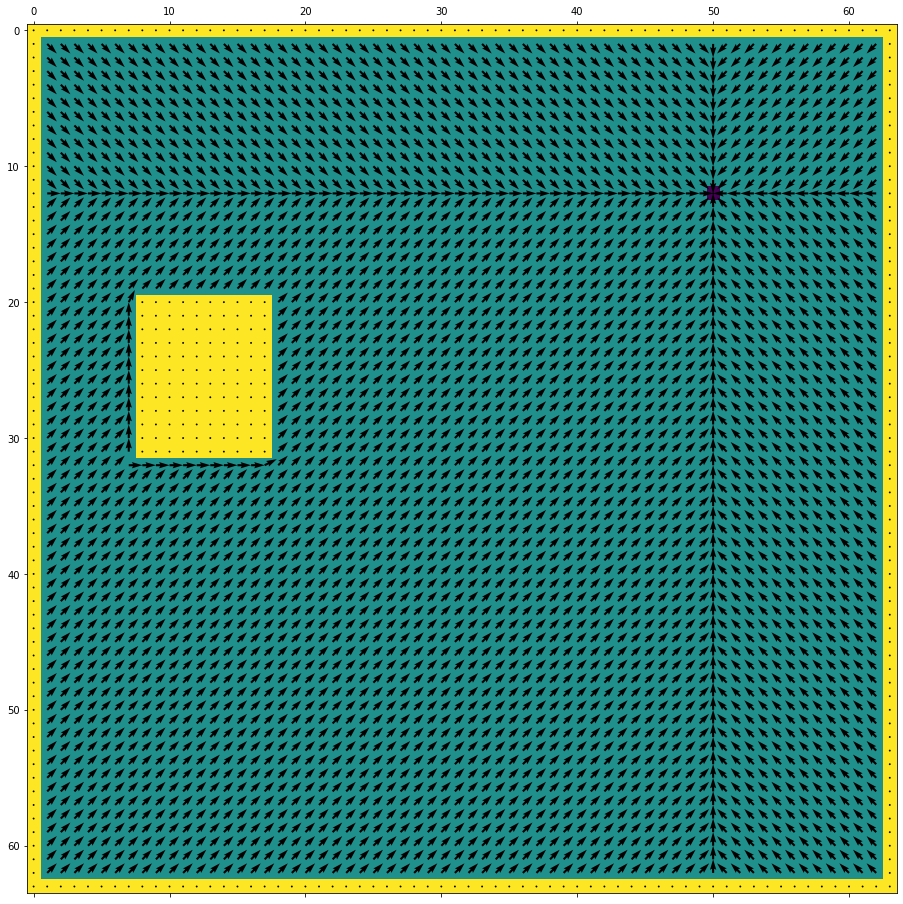

In [10]:
# timing some small changes:
occupancy_grid[30: 32, 32: 34] = 0

start_time = time.time()
attractor.update_occupancy_grid(occupancy_grid)
print("Updating time: {}s".format(time.time() - start_time))
attractor.plot_grad()